In [38]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D,Dropout
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
# Set random seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

In [3]:
# Data parameters
data_dir = r"D:\images download\New folder\working\Image-Sentiment-Analysis-master\blanced - no natural"
img_size = (224, 224)
batch_size = 32

In [4]:
# Data augmentation and generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)


In [5]:
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training',
    shuffle=True
)

Found 1394 images belonging to 2 classes.


In [6]:
validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation',
    shuffle=False
)

Found 348 images belonging to 2 classes.


In [7]:
# Class weights calculation
class_counts = [845, 897]  # Replace with actual counts if different
class_weights = {
    0: sum(class_counts)/class_counts[0],
    1: sum(class_counts)/class_counts[1]
}


In [8]:
# Model architecture
base_model = MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)

In [9]:
base_model.trainable = False  # Freeze base model

In [10]:
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = Dense(1, activation='sigmoid')(x)

model = Model(base_model.input, outputs)


In [11]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy', 
                       tf.keras.metrics.Precision(name='precision'),
                       tf.keras.metrics.Recall(name='recall')])

In [12]:
# Callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)


In [13]:
checkpoint = ModelCheckpoint(
    'best_model.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [14]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=30,
    class_weight=class_weights,
    callbacks=[early_stopping, checkpoint]
)


D:\anaconda\envs\tf_env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5308 - loss: 1.5576 - precision: 0.5518 - recall: 0.5165

43/43 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.5319 - loss: 1.5552 - precision: 0.5528 - recall: 0.5174 - val_accuracy: 0.5938 - val_loss: 0.6879 - val_precision: 0.7561 - val_recall: 0.2053
Epoch 2/30
 1/43 ━━━━━━━━━━━━━━━━━━━━ 14s 338ms/step - accuracy: 0.5556 - loss: 1.8446 - precision: 0.7500 - recall: 0.5000

D:\anaconda\envs\tf_env\lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


43/43 ━━━━━━━━━━━━━━━━━━━━ 11s 243ms/step - accuracy: 0.5556 - loss: 1.8446 - precision: 0.7500 - recall: 0.5000 - val_accuracy: 0.5750 - val_loss: 0.6831 - val_precision: 0.6923 - val_recall: 0.1788
Epoch 3/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6699 - loss: 1.2581 - precision: 0.6769 - recall: 0.6687

43/43 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.6704 - loss: 1.2568 - precision: 0.6776 - recall: 0.6691 - val_accuracy: 0.6500 - val_loss: 0.6371 - val_precision: 0.8197 - val_recall: 0.3311
Epoch 4/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 13s 302ms/step - accuracy: 0.7222 - loss: 1.1940 - precision: 0.8333 - recall: 0.5556 - val_accuracy: 0.6344 - val_loss: 0.6358 - val_precision: 0.7833 - val_recall: 0.3113
Epoch 5/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.7199 - loss: 1.0841 - precision: 0.7346 - recall: 0.7486 - val_accuracy: 0.6000 - val_loss: 0.7292 - val_precision: 0.8286 - val_recall: 0.1921
Epoch 6/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 9s 207ms/step - accuracy: 0.5938 - loss: 1.3753 - precision: 0.6000 - recall: 0.4000 - val_accuracy: 0.5938 - val_loss: 0.7240 - val_precision: 0.8387 - val_recall: 0.1722
Epoch 7/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.7502 - loss: 1.0117 - precision: 0.7625 - recall: 0.7671 - val_accuracy: 0.5719 - val_loss: 0.7850 - val_preci

In [15]:
# Evaluation
def plot_training_history(history):
    plt.figure(figsize=(12, 4))
    
    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()
    
    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

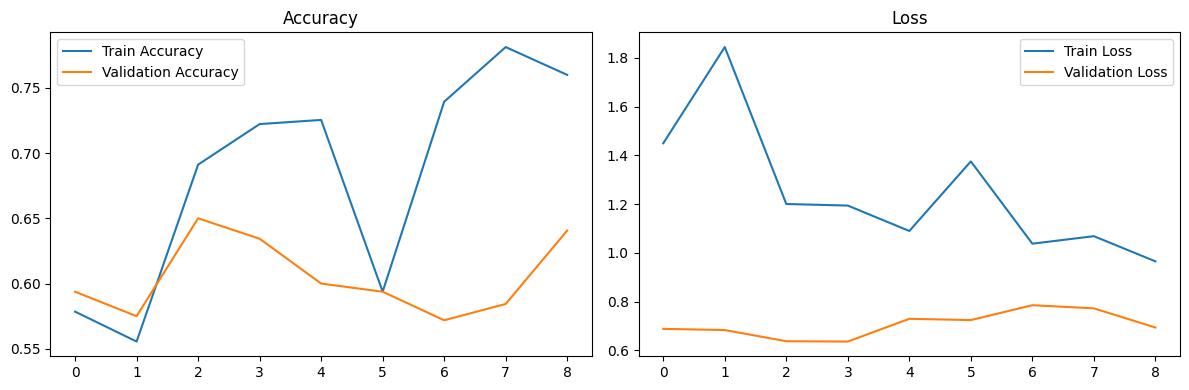

In [16]:
plot_training_history(history)

In [17]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
from keras.preprocessing import image


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


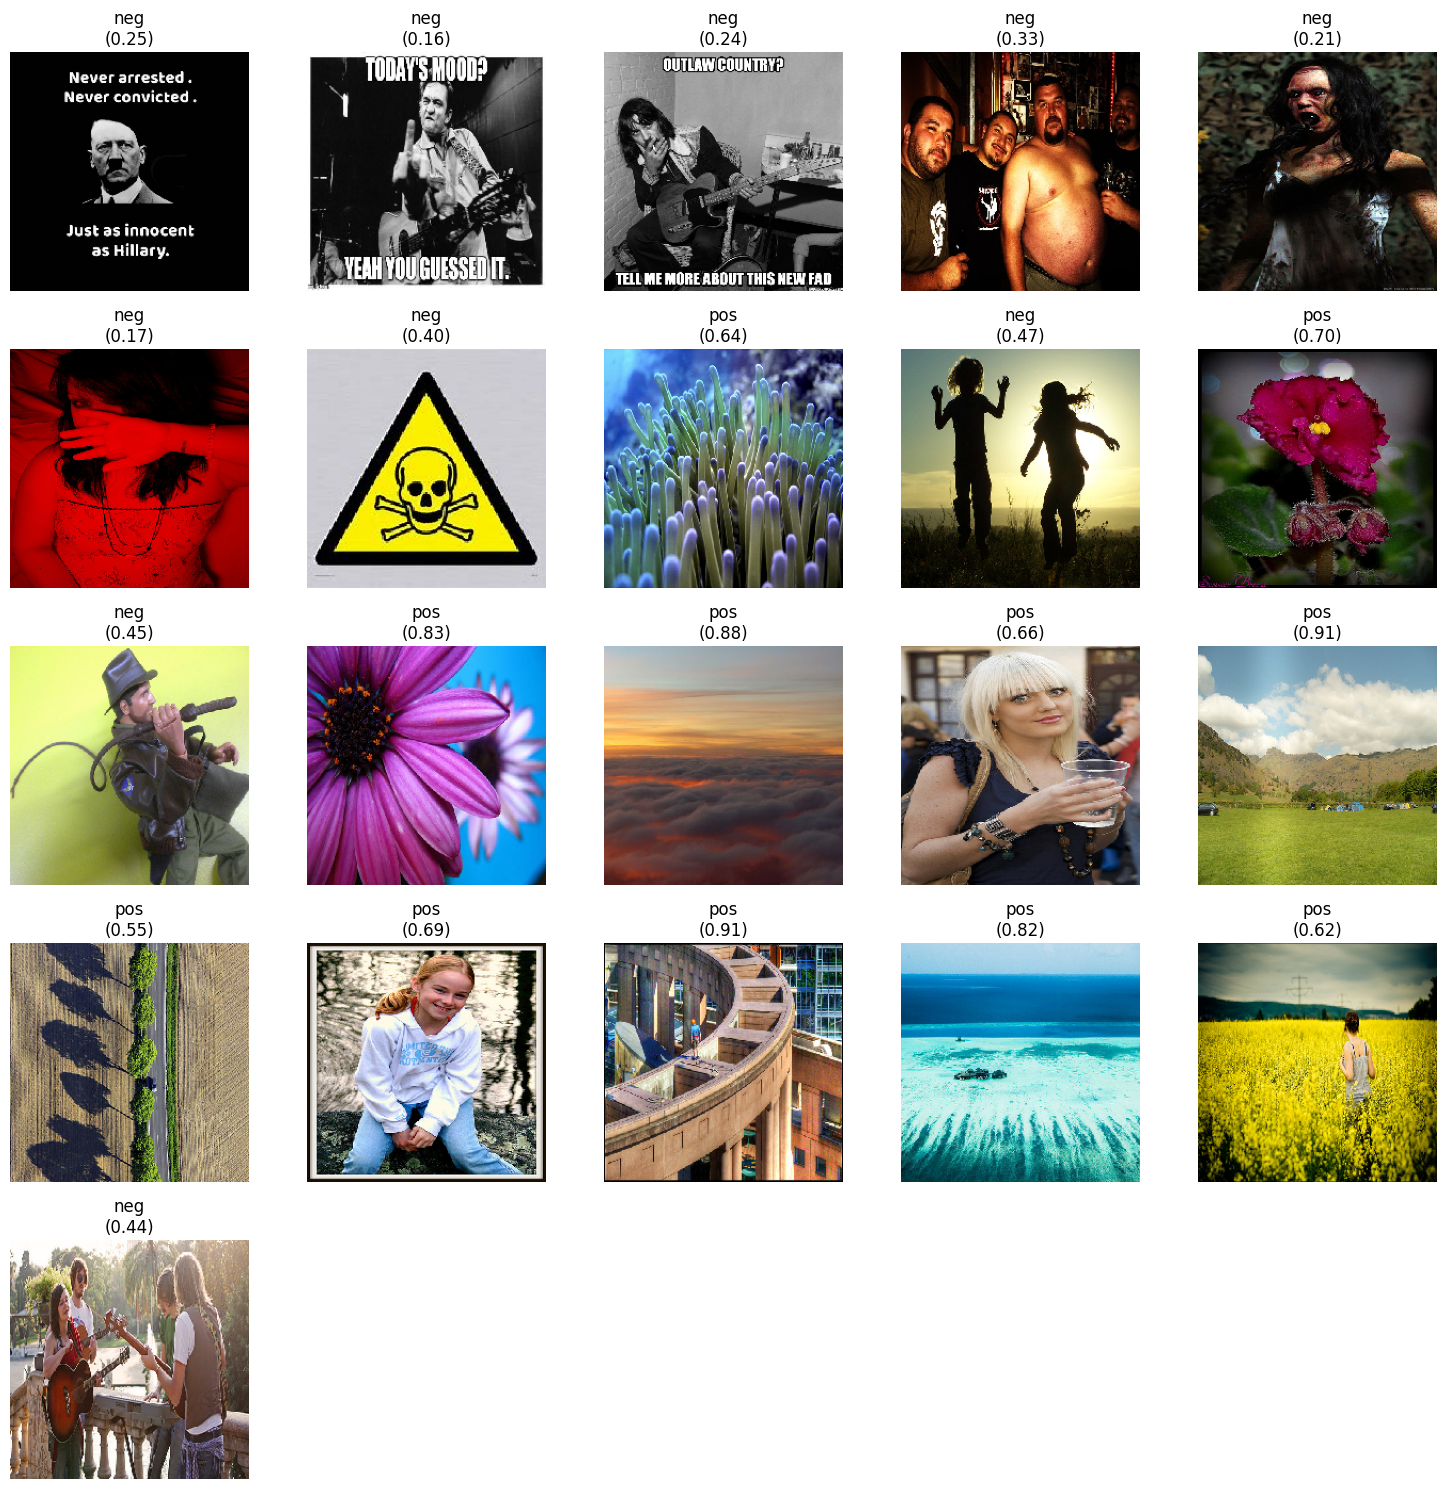


Prediction Summary:
neg: 10 images
pos: 11 images


In [22]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os
import math

# Define the test image directory (update with your actual path)
test_images_path = r"D:\images download\New folder\working\Image-Sentiment-Analysis-master\tested\t2 7x7x7"

# Get class mapping from training generator
class_mapping = {v: k for k, v in train_generator.class_indices.items()}

# Get a list of image filenames
file_names = [f for f in os.listdir(test_images_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Initialize list to store images
img_list = []

# Loop through the files, load and preprocess each image
for file in file_names:
    try:
        img_path = os.path.join(test_images_path, file)
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array /= 255.0  # Match training preprocessing
        img_list.append(img_array)
    except Exception as e:
        print(f"Error loading {file}: {str(e)}")
        continue

if not img_list:
    print("No valid images found in directory!")
else:
    # Convert list to numpy array
    X_test = np.array(img_list)

    # Make predictions
    predictions = model.predict(X_test)
    
    # Convert probabilities to class labels (0 or 1)
    predicted_classes = (predictions > 0.5).astype(int).flatten()
    
    # Create figure with dynamic size based on number of images
    num_images = len(X_test)
    cols = 5
    rows = math.ceil(num_images / cols)
    
    plt.figure(figsize=(cols*3, rows*3))
    for i in range(num_images):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(X_test[i])
        plt.title(f"{class_mapping[predicted_classes[i]]}\n({predictions[i][0]:.2f})")
        plt.axis("off")
    plt.tight_layout()
    plt.show()

    # Print class distribution
    unique, counts = np.unique(predicted_classes, return_counts=True)
    print("\nPrediction Summary:")
    for cls, count in zip(unique, counts):
        print(f"{class_mapping[cls]}: {count} images")

Found 494 images belonging to 2 classes.


D:\anaconda\envs\tf_env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 841ms/step

Classification Report:
              precision    recall  f1-score   support

         neg       0.70      0.63      0.66       185
         pos       0.79      0.84      0.82       309

    accuracy                           0.76       494
   macro avg       0.75      0.73      0.74       494
weighted avg       0.76      0.76      0.76       494



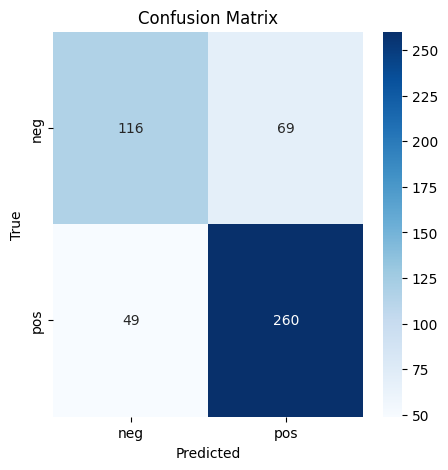

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set test directory (should have subdirectories 'neg' and 'pos')
test_dir = r"D:\images download\New folder\working\Image-Sentiment-Analysis-master\tested\test dir"

# Create test generator
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False  # Important for correct label order
)

# Get true labels
y_true = test_generator.classes

# Make predictions
y_pred_prob = model.predict(test_generator)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_mapping.values()))

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
           xticklabels=class_mapping.values(), 
           yticklabels=class_mapping.values())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Visualization of sample predictions (from previous code)
# ... [keep your existing visualization code here] ...

# enhanced


In [ ]:
def create_enhanced_model():
    base_model = MobileNetV2(
        input_shape=(224, 224, 3),
        include_top=False,
        weights='imagenet'
    )
    
    # Make last 20% of layers trainable
    base_model.trainable = True
    for layer in base_model.layers[:int(len(base_model.layers)*0.8)]:
        layer.trainable = False

    inputs = tf.keras.Input(shape=(224, 224, 3))
    x = base_model(inputs, training=False)
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.6)(x)
    x = Dense(128, activation='relu')(x)
    outputs = Dense(1, activation='sigmoid')(x)
    
    model = tf.keras.Model(inputs, outputs)
    
    return model

In [25]:
enhanced_model = create_enhanced_model()

In [26]:
#  Hyperparameter Configuration
LR_START = 1e-5
LR_MAX = 1e-4
LR_MIN = 1e-6
LR_RAMPUP_EPOCHS = 5
LR_SUSTAIN_EPOCHS = 0
LR_EXP_DECAY = 0.8

def lrfn(epoch):
    if epoch < LR_RAMPUP_EPOCHS:
        lr = (LR_MAX - LR_START) / LR_RAMPUP_EPOCHS * epoch + LR_START
    elif epoch < LR_RAMPUP_EPOCHS + LR_SUSTAIN_EPOCHS:
        lr = LR_MAX
    else:
        lr = (LR_MAX - LR_MIN) * LR_EXP_DECAY**(epoch - LR_RAMPUP_EPOCHS - LR_SUSTAIN_EPOCHS) + LR_MIN
    return lr

In [27]:
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lrfn, verbose=True)

In [28]:
# Cell 3: Model Compilation
enhanced_model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        tf.keras.metrics.AUC(name='auc')
    ]
)

In [29]:
# Cell 4: Enhanced Training Callbacks
enhanced_checkpoint = ModelCheckpoint(
    'enhanced_model.h5',
    save_best_only=True,
    monitor='val_auc',
    mode='max'
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=7,
    restore_best_weights=True
)

In [30]:
# Cell 5: Model Training
enhanced_history = enhanced_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=40,
    class_weight=class_weights,
    callbacks=[early_stopping, enhanced_checkpoint, lr_scheduler]
)


Epoch 1: LearningRateScheduler setting learning rate to 1e-05.
Epoch 1/40
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5261 - auc: 0.5244 - loss: 1.6654 - precision: 0.5300 - recall: 0.8562

43/43 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.5263 - auc: 0.5245 - loss: 1.6642 - precision: 0.5300 - recall: 0.8547 - val_accuracy: 0.5156 - val_auc: 0.5241 - val_loss: 0.7088 - val_precision: 0.4762 - val_recall: 0.2649 - learning_rate: 1.0000e-05

Epoch 2: LearningRateScheduler setting learning rate to 2.8000000000000003e-05.
Epoch 2/40
 1/43 ━━━━━━━━━━━━━━━━━━━━ 28s 676ms/step - accuracy: 0.6562 - auc: 0.6582 - loss: 1.2973 - precision: 0.6190 - recall: 0.8125

D:\anaconda\envs\tf_env\lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


43/43 ━━━━━━━━━━━━━━━━━━━━ 11s 236ms/step - accuracy: 0.6562 - auc: 0.6582 - loss: 1.2973 - precision: 0.6190 - recall: 0.8125 - val_accuracy: 0.4875 - val_auc: 0.4989 - val_loss: 0.7236 - val_precision: 0.4235 - val_recall: 0.2384 - learning_rate: 2.8000e-05

Epoch 3: LearningRateScheduler setting learning rate to 4.6e-05.
Epoch 3/40
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5958 - auc: 0.6195 - loss: 1.3881 - precision: 0.6321 - recall: 0.5879

43/43 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.5963 - auc: 0.6206 - loss: 1.3867 - precision: 0.6323 - recall: 0.5878 - val_accuracy: 0.5688 - val_auc: 0.7024 - val_loss: 0.7209 - val_precision: 0.8095 - val_recall: 0.1126 - learning_rate: 4.6000e-05

Epoch 4: LearningRateScheduler setting learning rate to 6.4e-05.
Epoch 4/40
43/43 ━━━━━━━━━━━━━━━━━━━━ 11s 250ms/step - accuracy: 0.6250 - auc: 0.6125 - loss: 1.5047 - precision: 0.7857 - recall: 0.5500 - val_accuracy: 0.5781 - val_auc: 0.7010 - val_loss: 0.7152 - val_precision: 0.8077 - val_recall: 0.1391 - learning_rate: 6.4000e-05

Epoch 5: LearningRateScheduler setting learning rate to 8.2e-05.
Epoch 5/40
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7034 - auc: 0.7727 - loss: 1.1338 - precision: 0.7108 - recall: 0.6974

43/43 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.7037 - auc: 0.7730 - loss: 1.1332 - precision: 0.7111 - recall: 0.6979 - val_accuracy: 0.6219 - val_auc: 0.8246 - val_loss: 0.7180 - val_precision: 0.9688 - val_recall: 0.2053 - learning_rate: 8.2000e-05

Epoch 6: LearningRateScheduler setting learning rate to 0.0001.
Epoch 6/40
43/43 ━━━━━━━━━━━━━━━━━━━━ 11s 235ms/step - accuracy: 0.6875 - auc: 0.7647 - loss: 1.1067 - precision: 0.6667 - recall: 0.6667 - val_accuracy: 0.6250 - val_auc: 0.7928 - val_loss: 0.7468 - val_precision: 0.9189 - val_recall: 0.2252 - learning_rate: 1.0000e-04

Epoch 7: LearningRateScheduler setting learning rate to 8.020000000000001e-05.
Epoch 7/40
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7765 - auc: 0.8592 - loss: 0.9454 - precision: 0.7774 - recall: 0.7859

43/43 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.7766 - auc: 0.8592 - loss: 0.9453 - precision: 0.7774 - recall: 0.7861 - val_accuracy: 0.6375 - val_auc: 0.8284 - val_loss: 0.7938 - val_precision: 0.8889 - val_recall: 0.2649 - learning_rate: 8.0200e-05

Epoch 8: LearningRateScheduler setting learning rate to 6.436000000000001e-05.
Epoch 8/40
43/43 ━━━━━━━━━━━━━━━━━━━━ 13s 299ms/step - accuracy: 0.9375 - auc: 1.0000 - loss: 0.5506 - precision: 1.0000 - recall: 0.9000 - val_accuracy: 0.6375 - val_auc: 0.8061 - val_loss: 0.8314 - val_precision: 0.8723 - val_recall: 0.2715 - learning_rate: 6.4360e-05


In [33]:
# Cell 6: Fixed Fine-Tuning Stage
def prepare_for_fine_tuning(model):
    # Unfreeze all layers
    model.trainable = True
    
    # Recompile with lower learning rate
    model.compile(
        optimizer=Adam(learning_rate=1e-6),
        loss='binary_crossentropy',
        metrics=['accuracy', 'precision', 'recall', 'auc']
    )
    return model

In [34]:
# Load best model from previous training
fine_tuned_model = tf.keras.models.load_model('enhanced_model.h5')
fine_tuned_model = prepare_for_fine_tuning(fine_tuned_model)

In [35]:
# Cell 7: Fixed Fine-Tuning Training
fine_tune_history = fine_tuned_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=15,
    class_weight=class_weights,
    callbacks=[early_stopping]
)

Epoch 1/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.8063 - auc: 0.9007 - loss: 0.8536 - precision: 0.8874 - recall: 0.7322 - val_accuracy: 0.6500 - val_auc: 0.8134 - val_loss: 0.7949 - val_precision: 0.9333 - val_recall: 0.2781
Epoch 2/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 11s 241ms/step - accuracy: 0.8438 - auc: 0.9544 - loss: 0.6242 - precision: 0.9333 - recall: 0.7778 - val_accuracy: 0.6406 - val_auc: 0.8244 - val_loss: 0.7877 - val_precision: 0.8750 - val_recall: 0.2781
Epoch 3/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.8317 - auc: 0.9111 - loss: 0.7813 - precision: 0.8586 - recall: 0.8051 - val_accuracy: 0.6500 - val_auc: 0.8374 - val_loss: 0.7773 - val_precision: 0.9149 - val_recall: 0.2848
Epoch 4/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 10s 212ms/step - accuracy: 0.6875 - auc: 0.7922 - loss: 1.0371 - precision: 0.6471 - recall: 0.7333 - val_accuracy: 0.6344 - val_auc: 0.8216 - val_loss: 0.8222 - val_precision: 0.9048 - val_recall: 0.2517
Epoch 5/15
43/43 ━━━━━━━━━━━━━━━━━

# EfficientNetB3

In [36]:
# Cell 8: EfficientNetB3 Model Creation
def create_efficientnet_model():
    base_model = tf.keras.applications.EfficientNetB3(
        input_shape=(224, 224, 3),
        include_top=False,
        weights='imagenet'
    )
    
    # Freeze base model initially
    base_model.trainable = False
    
    inputs = tf.keras.Input(shape=(224, 224, 3))
    x = base_model(inputs)
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    
    model = tf.keras.Model(inputs, outputs)
    return model

In [39]:
efficientnet_model = create_efficientnet_model()

In [41]:
# Cell 9: EfficientNet Compilation
efficientnet_model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy', 'precision', 'recall', 'auc']
)


In [42]:
# Cell 10: EfficientNet Training
effnet_checkpoint = ModelCheckpoint(
    'effnet_model.h5',
    save_best_only=True,
    monitor='val_auc',
    mode='max'
)


In [43]:
effnet_history = efficientnet_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=30,
    class_weight=class_weights,
    callbacks=[early_stopping, effnet_checkpoint, lr_scheduler]
)


Epoch 1: LearningRateScheduler setting learning rate to 1e-05.
Epoch 1/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4978 - auc: 0.5169 - loss: 1.4107 - precision: 0.5016 - recall: 0.7347

43/43 ━━━━━━━━━━━━━━━━━━━━ 130s 2s/step - accuracy: 0.4976 - auc: 0.5165 - loss: 1.4105 - precision: 0.5017 - recall: 0.7316 - val_accuracy: 0.5281 - val_auc: 0.5498 - val_loss: 0.6912 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 1.0000e-05

Epoch 2: LearningRateScheduler setting learning rate to 2.8000000000000003e-05.
Epoch 2/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 18s 404ms/step - accuracy: 0.3889 - auc: 0.4125 - loss: 1.4616 - precision: 0.3333 - recall: 0.3750 - val_accuracy: 0.5281 - val_auc: 0.5247 - val_loss: 0.6915 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 2.8000e-05

Epoch 3: LearningRateScheduler setting learning rate to 4.6e-05.
Epoch 3/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4968 - auc: 0.5090 - loss: 1.3980 - precision: 0.5017 - recall: 0.4592

43/43 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.4969 - auc: 0.5088 - loss: 1.3981 - precision: 0.5020 - recall: 0.4608 - val_accuracy: 0.4719 - val_auc: 0.5808 - val_loss: 0.6956 - val_precision: 0.4717 - val_recall: 0.9934 - learning_rate: 4.6000e-05

Epoch 4: LearningRateScheduler setting learning rate to 6.4e-05.
Epoch 4/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 19s 428ms/step - accuracy: 0.6250 - auc: 0.5332 - loss: 1.3937 - precision: 0.5769 - recall: 0.9375 - val_accuracy: 0.4812 - val_auc: 0.5739 - val_loss: 0.6931 - val_precision: 0.4752 - val_recall: 0.9536 - learning_rate: 6.4000e-05

Epoch 5: LearningRateScheduler setting learning rate to 8.2e-05.
Epoch 5/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 95s 2s/step - accuracy: 0.5072 - auc: 0.5178 - loss: 1.3873 - precision: 0.5416 - recall: 0.5753 - val_accuracy: 0.5281 - val_auc: 0.5716 - val_loss: 0.6898 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 8.2000e-05

Epoch 6: LearningRateScheduler setting learning rate to 0.0001.

43/43 ━━━━━━━━━━━━━━━━━━━━ 24s 534ms/step - accuracy: 0.5000 - auc: 0.4854 - loss: 1.3820 - precision: 0.6000 - recall: 0.6000 - val_accuracy: 0.5688 - val_auc: 0.5894 - val_loss: 0.6886 - val_precision: 0.5496 - val_recall: 0.4768 - learning_rate: 6.4360e-05

Epoch 9: LearningRateScheduler setting learning rate to 5.168800000000001e-05.
Epoch 9/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 110s 3s/step - accuracy: 0.5242 - auc: 0.5213 - loss: 1.3907 - precision: 0.5388 - recall: 0.7054 - val_accuracy: 0.5281 - val_auc: 0.5696 - val_loss: 0.6888 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 5.1688e-05

Epoch 10: LearningRateScheduler setting learning rate to 4.155040000000001e-05.
Epoch 10/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 20s 439ms/step - accuracy: 0.5625 - auc: 0.5725 - loss: 1.3719 - precision: 0.6000 - recall: 0.2000 - val_accuracy: 0.5281 - val_auc: 0.5669 - val_loss: 0.6894 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 4.1550e-05

Epoch 11: LearningRat

43/43 ━━━━━━━━━━━━━━━━━━━━ 21s 449ms/step - accuracy: 0.5000 - auc: 0.4297 - loss: 1.4169 - precision: 0.5000 - recall: 0.5625 - val_accuracy: 0.5531 - val_auc: 0.5903 - val_loss: 0.6855 - val_precision: 0.5556 - val_recall: 0.2649 - learning_rate: 7.8032e-06

Epoch 19: LearningRateScheduler setting learning rate to 6.442582557491204e-06.
Epoch 19/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.4828 - auc: 0.4863 - loss: 1.3981 - precision: 0.5135 - recall: 0.4848 - val_accuracy: 0.5625 - val_auc: 0.5665 - val_loss: 0.6882 - val_precision: 0.5618 - val_recall: 0.3311 - learning_rate: 6.4426e-06

Epoch 20: LearningRateScheduler setting learning rate to 5.354066045992964e-06.
Epoch 20/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 20s 432ms/step - accuracy: 0.4688 - auc: 0.5625 - loss: 1.3777 - precision: 0.4706 - recall: 0.5000 - val_accuracy: 0.5375 - val_auc: 0.5596 - val_loss: 0.6870 - val_precision: 0.5161 - val_recall: 0.3179 - learning_rate: 5.3541e-06

Epoch 21: LearningRateScheduler sett

43/43 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.5020 - auc: 0.5013 - loss: 1.3920 - precision: 0.5188 - recall: 0.4902 - val_accuracy: 0.5625 - val_auc: 0.5925 - val_loss: 0.6851 - val_precision: 0.5534 - val_recall: 0.3775 - learning_rate: 4.4833e-06

Epoch 22: LearningRateScheduler setting learning rate to 3.786602269435497e-06.
Epoch 22/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 20s 430ms/step - accuracy: 0.5000 - auc: 0.7417 - loss: 1.3617 - precision: 0.4091 - recall: 0.7500 - val_accuracy: 0.5562 - val_auc: 0.5791 - val_loss: 0.6863 - val_precision: 0.5413 - val_recall: 0.3907 - learning_rate: 3.7866e-06

Epoch 23: LearningRateScheduler setting learning rate to 3.2292818155483983e-06.
Epoch 23/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.4980 - auc: 0.5026 - loss: 1.3917 - precision: 0.5043 - recall: 0.4759 - val_accuracy: 0.5312 - val_auc: 0.5564 - val_loss: 0.6886 - val_precision: 0.5052 - val_recall: 0.3245 - learning_rate: 3.2293e-06

Epoch 24: LearningRateScheduler settin

In [44]:
# Cell 11: EfficientNet Fine-Tuning
effnet_model = tf.keras.models.load_model('effnet_model.h5')
effnet_model.trainable = True

effnet_model.compile(
    optimizer=Adam(learning_rate=1e-6),
    loss='binary_crossentropy',
    metrics=['accuracy', 'precision', 'recall', 'auc']
)

In [45]:
effnet_finetune_history = effnet_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=15,
    class_weight=class_weights,
    callbacks=[early_stopping]
)

Epoch 1/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 110s 2s/step - accuracy: 0.5436 - auc: 0.5566 - loss: 1.3762 - precision: 0.5681 - recall: 0.4832 - val_accuracy: 0.5281 - val_auc: 0.5292 - val_loss: 0.6924 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 18s 396ms/step - accuracy: 0.6250 - auc: 0.5688 - loss: 1.3839 - precision: 0.5294 - recall: 0.6923 - val_accuracy: 0.5281 - val_auc: 0.5111 - val_loss: 0.6924 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.5208 - auc: 0.5370 - loss: 1.3812 - precision: 0.5404 - recall: 0.5050 - val_accuracy: 0.5281 - val_auc: 0.5289 - val_loss: 0.6924 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 19s 422ms/step - accuracy: 0.4688 - auc: 0.5238 - loss: 1.3736 - precision: 0.5294 - recall: 0.5000 - val_accuracy: 0.5281 - val_auc: 0.5120 - val_loss: 0.6923 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
E

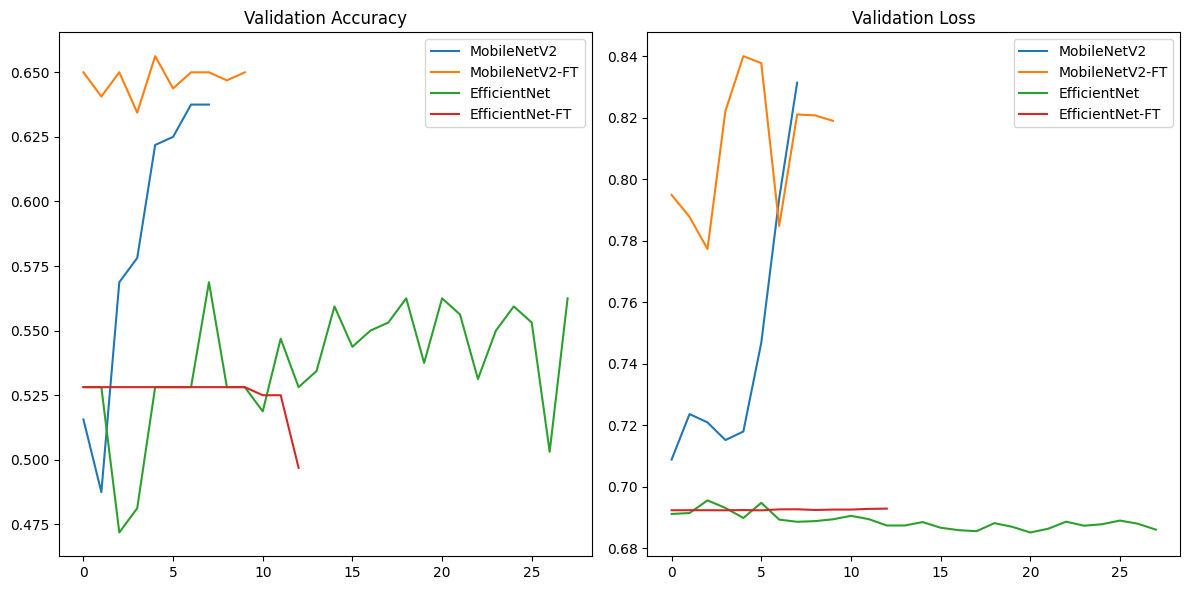

In [46]:
# Cell 12: Comparison
def compare_histories(histories, labels):
    plt.figure(figsize=(12, 6))
    
    # Accuracy comparison
    plt.subplot(1, 2, 1)
    for history, label in zip(histories, labels):
        plt.plot(history.history['val_accuracy'], label=label)
    plt.title('Validation Accuracy')
    plt.legend()
    
    # Loss comparison
    plt.subplot(1, 2, 2)
    for history, label in zip(histories, labels):
        plt.plot(history.history['val_loss'], label=label)
    plt.title('Validation Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Compare models
histories = [enhanced_history, fine_tune_history, effnet_history, effnet_finetune_history]
labels = ['MobileNetV2', 'MobileNetV2-FT', 'EfficientNet', 'EfficientNet-FT']
compare_histories(histories, labels)

In [ ]:
# After training, compare model histories
plot_training_history(enhanced_history)  # Use your existing plotting function
plot_training_history(fine_tune_history)

In [ ]:
# Evaluate final model
enhanced_model.evaluate(test_generator)  # Use your test generator